# Importing

Section for importing relevant package and pre-install process; 

hidden to avoid cluttering in Notebook

In [1]:
# Pre-install & main import cluseter - install or import checker 
import pip

# package 
# https://stackoverflow.com/questions/4527554/check-if-module-exists-if-not-install-it
def import_or_install(package):
    try:
        __import__(package)
        print(f"'{package}': import successful")
    except ImportError:
        print(f"'{package}': import error; installing instead")
        pip.main(['install', package])


import_or_install("pandas")
import_or_install("scikit-learn")
import_or_install("tabulate")

'pandas': import successful
'scikit-learn': import error; installing instead


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: scikit-learn in d:\python project\myproject\python-project\.venv\lib\site-packages (1.7.0)

Requirement already satisfied: numpy>=1.22.0 in d:\python project\myproject\python-project\.venv\lib\site-packages (from scikit-learn) (2.2.3)

Requirement already satisfied: scipy>=1.8.0 in d:\python project\myproject\python-project\.venv\lib\site-packages (from scikit-learn) (1.15.3)

Requirement already satisfied: joblib>=1.2.0 in d:\python project\myproject\python-project\.venv\lib\site-packages (from scikit-learn) (1.5.1)

Requirement already satisfied: threadpoolctl>=3.1.0 in d:\python project\myproject\python-project\.venv\lib\site-packages (from scikit-learn) (3.6.0)

'tabulate': import successful


In [2]:
# Main import cluster
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
from IPython.display import display, Markdown, Latex

# 0. Load data

In [4]:
# Load data (csv.)

# Get base path method that works with Jupyter notebook
# https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
base_path = os.path.abspath('')
print(base_path)

# read the relevant data from the 'Out' folder
order_seller_review_path = os.path.join(base_path,"Out","order overall.csv")
product_cat_translation_path = os.path.join(base_path,"Out","product cat translation.csv")

date_list = ['order_purchase_timestamp',
             'order_approved_at',
             'order_delivered_carrier_date',
             'order_delivered_customer_date',
             'order_estimated_delivery_date']

# parse_dates = specify which columns to convert to date unit
df_base = pd.read_csv(order_seller_review_path, parse_dates=date_list)

df_product_cat_translation = pd.read_csv(product_cat_translation_path)

# join main table with en product name
df_base = pd.merge(df_base, df_product_cat_translation, on="product_category_name", how="left")

min_date = df_base['order_purchase_timestamp'].min().strftime('%Y/%m/%d')
max_date = df_base['order_purchase_timestamp'].max().strftime('%Y/%m/%d')

df_cat_check = df_base[["product_category_name",'product_category_name_english']].drop_duplicates()
df_cat_check = df_cat_check.groupby(['product_category_name','product_category_name_english']).size().to_frame()
display(df_cat_check)

# Create columns variable to be rendered below
columns = df_base.columns.tolist()

G:\Python\SQL-Tk-practice-project


,,0
product_category_name,product_category_name_english,
agro_industria_e_comercio,agro_industry_and_commerce,1
alimentos,food,1
alimentos_bebidas,food_drink,1
artes,art,1
artes_e_artesanato,arts_and_craftmanship,1
...,...,...
sinalizacao_e_seguranca,signaling_and_security,1
tablets_impressao_imagem,tablets_printing_image,1
telefonia,telephony,1


## Functions
Code block containing all functions to be used

In [5]:
def list_to_stringlist(df_in:list)->str:
    final_string=""
    start_int = 1
    
    for index, item in enumerate(df_in):
        final_string += (f"{start_int}: {item} \n" + 
                         "\n")
        start_int +=1

    return final_string

# format currency function
# https://www.geeksforgeeks.org/how-to-format-numbers-as-currency-strings-in-python/
def format_currency(amount:float|int, currency:str=""):

    format_use = f'{currency+" "}'+'{:,.2f}'
    
    return format_use.format(amount)

In [6]:
title_with_label = ("# Introduction \n"
                 "\n"
                 "This is the report of sales between **{}** to **{}**").format(min_date, max_date)
test_out = 3.1415
# Title markdown display
display(Markdown(f"{title_with_label}"))

# Output 1 markdown display
display(Markdown(f"The out value is: {test_out}"))

# Introduction 

This is the report of sales between **2016/09/04** to **2018/10/16**

The out value is: 3.1415

In [7]:
# convert columns obtains from above and convert into string list to be used for markdown
column_md_1 = ("## Columnn \n Columns contained within the dataframe of data loaded, displayed below in list as:\n")
column_md_2 = list_to_stringlist(columns)
markdown_space = "\n"


display(Markdown(column_md_1
                + markdown_space
                + column_md_2))

## Columnn 
 Columns contained within the dataframe of data loaded, displayed below in list as:

1: order_id 

2: customer_id 

3: order_status 

4: order_purchase_timestamp 

5: order_approved_at 

6: order_delivered_carrier_date 

7: order_delivered_customer_date 

8: order_estimated_delivery_date 

9: seller_id 

10: price 

11: review_score 

12: product_id 

13: product_category_name 

14: product_weight_g 

15: product_category_name_english 



# 1. Descriptive analysis
Display and output sales data in a Descriptive manner:

1. Sales by product catergory name
2. Order Status percentage
3. Sales by weight category
4. Review score
5. Median Price

1. Sales by product category
                       sales vol  sales vol percentage
bed_bath_table             11270             10.324957
health_beauty               9727              8.911345
sports_leisure              8700              7.970463
furniture_decor             8415              7.709362
computers_accessories       7894              7.232050
housewares                  6989              6.402939
watches_gifts               6001              5.497788
telephony                   4550              4.168461
garden_tools                4361              3.995309
auto                        4256              3.899114
toys                        4125              3.779099
cool_stuff                  3806              3.486849
perfumery                   3435              3.146959
baby                        3073              2.815314
electronics                 2768              2.535890
other                      19783             18.124101


<Axes: ylabel='sales vol'>

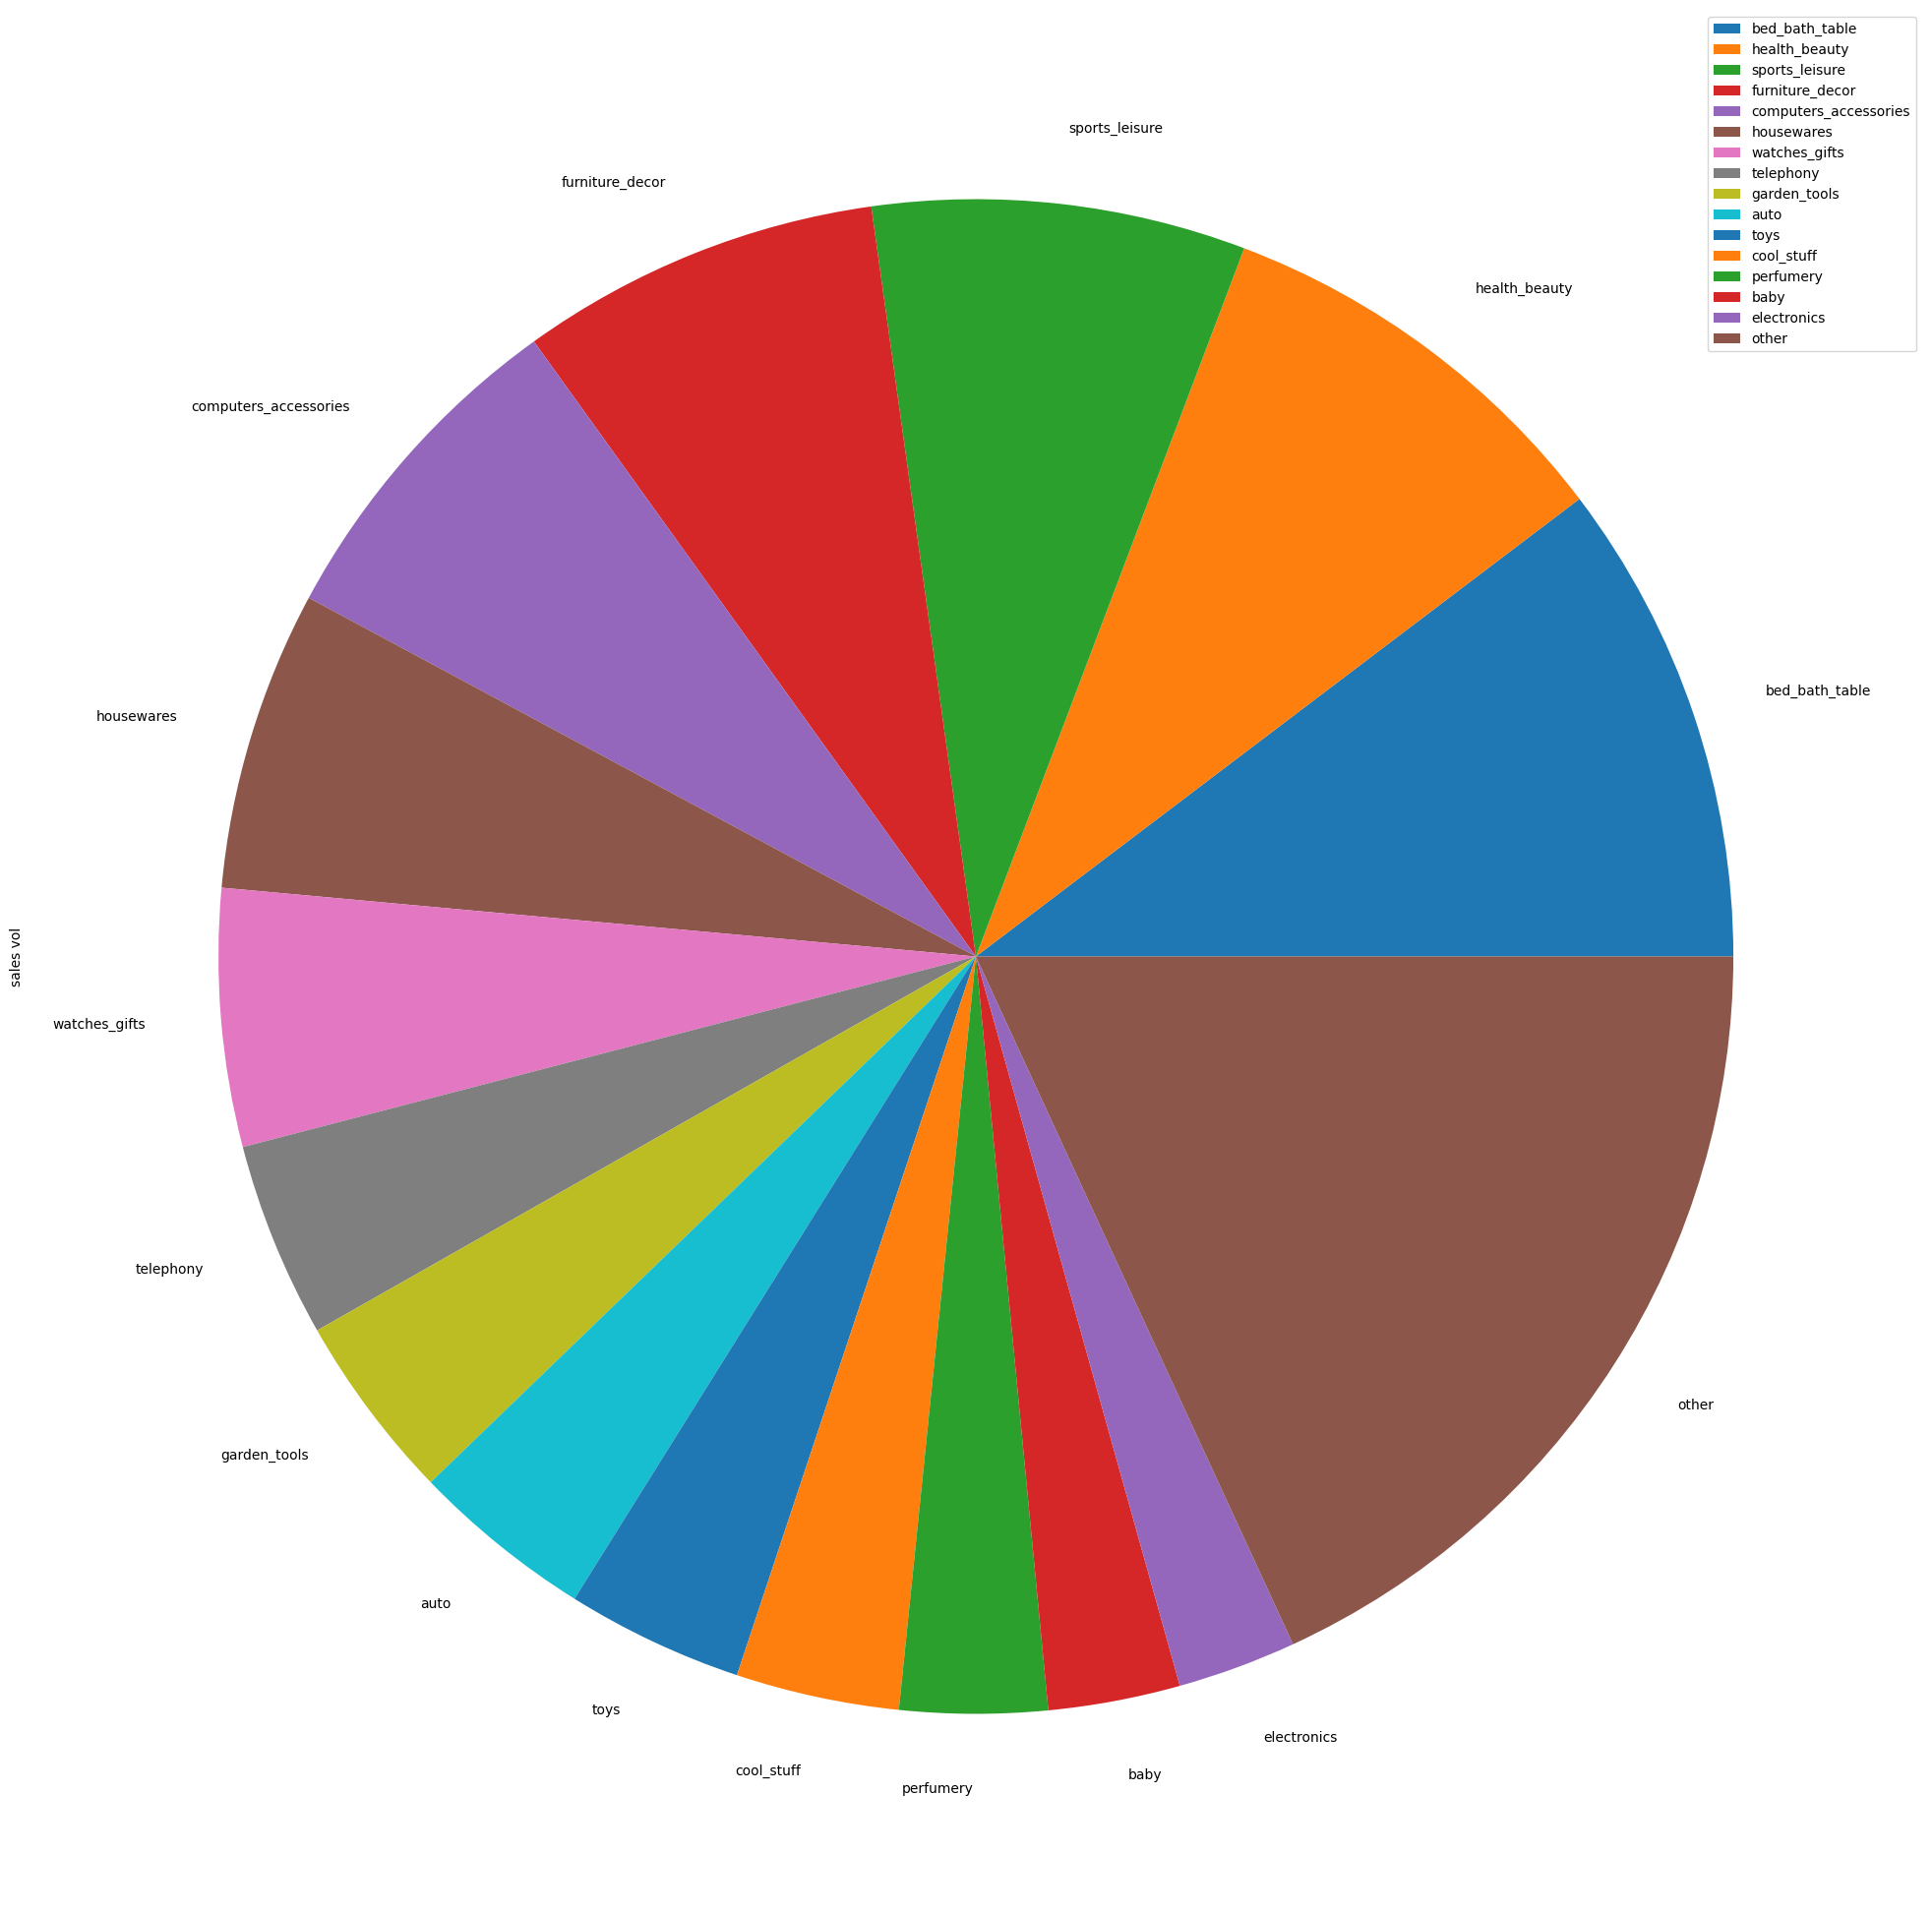

In [8]:
# 1. Sales by product category name
df_sales_cat = df_base[["product_category_name_english","price"]]

# All category


# Top 25 and others
# https://stackoverflow.com/questions/67142016/sort-top-n-and-group-others-in-pandas-df
df_sales_cat = df_sales_cat.groupby(["product_category_name_english"]).size().to_frame('sales vol').sort_values(by='sales vol',ascending=False)
df_sales_cat_t10 = df_sales_cat.iloc[:15]
df_sales_cat_others = df_sales_cat.iloc[16:].sum().to_frame('sales vol')

# Rename index from original to 'other'
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
df_sales_cat_others.rename({'sales vol':'other'}, inplace=True)
df_sales_cat_final = pd.concat([df_sales_cat_t10,df_sales_cat_others])
df_sales_cat_final['sales vol percentage'] = (df_sales_cat_final['sales vol'] / df_sales_cat_final['sales vol'].sum()) * 100
# df_sales_cat_final['sales percentage']

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html

print("1. Sales by product category")
print(df_sales_cat_final)
df_sales_cat_final.plot.pie(y='sales vol', figsize=(25, 25))

In [9]:
# 2. Order status percentage

df_order_stat = df_base[["order_status","price"]]

df_order_stat = df_order_stat.groupby(["order_status"]).size().to_frame('vol').sort_values(by='vol',ascending=False)
df_order_stat['percentage'] = (df_order_stat['vol'] / df_order_stat['vol'].sum()) * 100

# Reformat float64 to percentage
df_order_stat['percentage'] = df_order_stat['percentage'].apply(lambda x: f"{x:.2f}%")

# print('The order status break down are as follow \n'
#       '\n'
#      'The table:')
# print(df_order_stat.to_markdown())

markdown_1 = ('The **order status** status are as follow:\n'
              + '\n' 
              + df_order_stat.to_markdown())

display(Markdown(markdown_1))

The **order status** status are as follow:

| order_status   |    vol | percentage   |
|:---------------|-------:|:-------------|
| delivered      | 110840 | 97.15%       |
| shipped        |   1197 | 1.05%        |
| canceled       |    710 | 0.62%        |
| unavailable    |    612 | 0.54%        |
| invoiced       |    366 | 0.32%        |
| processing     |    358 | 0.31%        |
| created        |      5 | 0.00%        |
| approved       |      3 | 0.00%        |

| Weight Cat       |   vol |   percentage |
|:-----------------|------:|-------------:|
| <=0.5kg          | 45533 |     41.9887  |
| >1.0KG - 3.0KG   | 25051 |     23.101   |
| >0.5 kg - 1.0 kg | 19788 |     18.2477  |
| >5.0KG - 10.0KG  |  8315 |      7.66776 |
| >10.0KG          |  5074 |      4.67904 |
| >3.0KG - 5.0KG   |  4680 |      4.31571 |

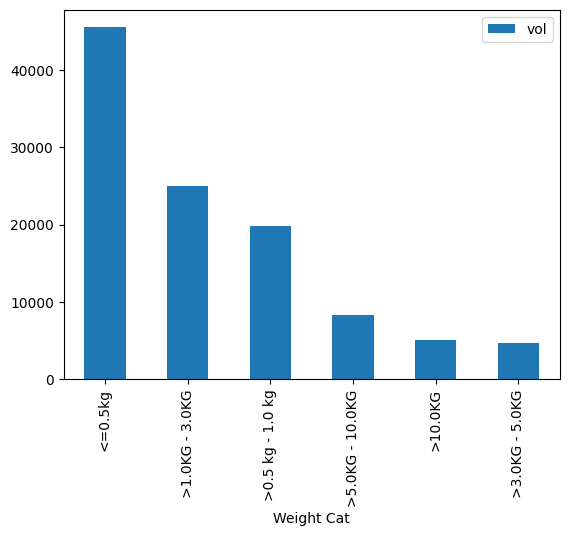

In [28]:
# 3. Sales by weight category
df_weight = df_base.dropna() # Drop na / empty weight data

# Explicit declare of copy to avoid Pandas confusing user trying to slice df
df_weight = df_weight.copy()


# https://stackoverflow.com/questions/58829730/setting-the-values-of-a-pandas-df-column-based-on-ranges-of-values-of-another-df
# solution for truth value error:
# https://stackoverflow.com/questions/36921951/truth-value-of-a-series-is-ambiguous-use-a-empty-a-bool-a-item-a-any-o
# https://stackoverflow.com/questions/71515627/pandas-settingwithcopywarning-on-basic-np-where-statement
conditions = [(df_weight["product_weight_g"] <= 500),
              (df_weight["product_weight_g"] > 500) & (df_weight["product_weight_g"] <= 1000),
              (df_weight["product_weight_g"] > 1000) & (df_weight["product_weight_g"] <= 3000),
              (df_weight["product_weight_g"] > 3000) & (df_weight["product_weight_g"] <= 5000),
              (df_weight["product_weight_g"] > 5000) & (df_weight["product_weight_g"] <= 10000),
              (df_weight["product_weight_g"] > 10000)]

choice = ['<=0.5kg', '>0.5 kg - 1.0 kg', '>1.0KG - 3.0KG', '>3.0KG - 5.0KG', '>5.0KG - 10.0KG','>10.0KG']

df_weight['Weight Cat'] = np.select(conditions, choice, default="Other")

df_weight_final = df_weight.groupby('Weight Cat').size().to_frame('vol')
df_weight_final['percentage'] = (df_weight_final['vol'] / df_weight_final['vol'].sum()) * 100
df_weight_final = df_weight_final.sort_values(by='vol', ascending=False)
# print(df_weight_final)

markdown_1 = df_weight_final.to_markdown()
display(Markdown(markdown_1))
df_weight_final_plot = df_weight_final.plot.bar(y='vol')


In [11]:
# 4. Review score
# print(df_base["review_score"].unique()) # debug column only; disable when not required

df_review = df_base[["review_score"]].dropna()

df_review = df_review.groupby(["review_score"]).size().to_frame('vol').sort_values(by='review_score', ascending=False)

df_review['percentage'] = (df_review['vol'] / df_review['vol'].sum()) * 100

display(Markdown(df_review.to_markdown()))

|   review_score |   vol |   percentage |
|---------------:|------:|-------------:|
|              5 | 63596 |     56.215   |
|              4 | 21348 |     18.8703  |
|              3 |  9476 |      8.3762  |
|              2 |  3936 |      3.47918 |
|              1 | 14774 |     13.0593  |

# 2. Sales analysis

Section for analysis focusing on revenue / sales generated during the period.

### Brain storming:
**The following are potential point of analysis regarding sales and revenue:**
1. Total Revenue
2. Revenue by seller (average/mean, mean, median, quartile)
3. Revenue by product category
4. Revenue by weight class
5. Revenue by dates (Calendar/heatmap & table)

In [12]:
# 2.1. Total revenue
df_total_revenue = df_base[["price"]].sum()

total_revenue = df_total_revenue.iloc[0]

# format currency function
# https://www.geeksforgeeks.org/how-to-format-numbers-as-currency-strings-in-python/
def format_currency(amount:float|int, currency:str=""):

    format_use = f'{currency+" "}'+'{:,.2f}'
    
    return format_use.format(amount)

total_revenue = format_currency(total_revenue, "BRL")

display(Markdown(f"The total revenue is: **{total_revenue}**"))

The total revenue is: **BRL 13,596,704.58**

## 2.1 Revenue by seller 
 
 ### Summary
1. The the mean revenue of all sellers is: **BRL 4,440.56**
2. The the median revenue of all sellers is: **BRL 849.50**

 3. The following is the revenue by quartile breakdown of revenue:
|      |   revenue |
|-----:|----------:|
| 0.1  |     83.9  |
| 0.25 |    224.3  |
| 0.75 |   3478.93 |
| 0.9  |   9560.32 |
4. Table of seller count distributed by total revenue:

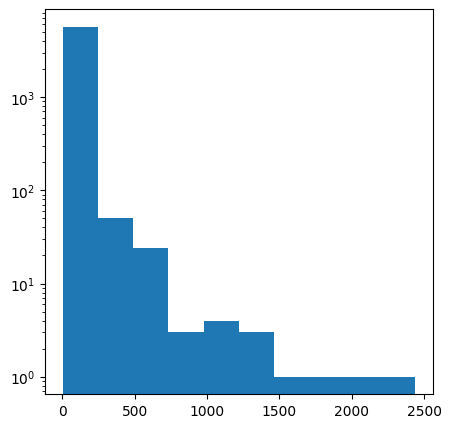

In [74]:
# 2.2. Revenue by seller (average/mean, mean, median, quartile)
df_revenue_seller_base = df_base[["price", "seller_id"]]

df_revenue_seller = df_revenue_seller_base.groupby("seller_id")["price"].sum().to_frame("revenue")
# df_revenue_seller = df_revenue_seller.group_by(["seller_id"])

# 1. Mean
df_revenue_seller_mean = df_revenue_seller.mean().iloc[0]
revenue_seller_mean = format_currency(df_revenue_seller_mean,"BRL")

# 2. Median
df_revenue_seller_median = df_revenue_seller.median().iloc[0]
revenue_seller_median = format_currency(df_revenue_seller_median, "BRL")

# 3. quantile
df_revenue_seller_quar = df_revenue_seller.quantile([.1, .25, .75, .90], method="single", interpolation='nearest')

# 4. Table
df_revenue_count_table = df_revenue_seller_base.groupby("price")["seller_id"].count().to_frame("seller count")
df_revenue_count_table.rename(columns={"price":"revenue"}, inplace=True)
# print(df_revenue_count_table.sort_values(by="seller count", ascending=False))
# df_revenue_count_plot = df_revenue_count_table.plot()


# Markdown
markdown_space = "\n"
markdown_title = "## 2.1 Revenue by seller \n \n ### Summary"
markdown_1 = "1. The the mean revenue of all sellers is: **{}**".format(revenue_seller_mean)
markdown_2 = "2. The the median revenue of all sellers is: **{}**".format(revenue_seller_median)
markdown_3 = ("\n 3. The following is the revenue by quartile breakdown of revenue:" 
              + "\n" 
              + df_revenue_seller_quar.to_markdown())
markdown_4 = "4. Table of seller count distributed by total revenue:"

final_markdown = Markdown(markdown_title 
                          + markdown_space
                          + markdown_1 
                          + markdown_space
                          + markdown_2
                          + markdown_space
                          + markdown_3
                          + markdown_space
                          + markdown_4)

display(final_markdown)

# Histogram / plot
# old method: using built in '.plot' and '.hist' for graph
# display(df_revenue_count_table.plot())

# new method: use matplotlib directly
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(df_revenue_count_table['seller count'])
ax.set_yscale("log")
# https://stackoverflow.com/questions/21920233/matplotlib-log-scale-tick-label-number-formatting

# df_revenue_count_hist = plt.hist(df_revenue_count_table['seller count'], log=True, bins=50)

In [24]:
# 2.2.1 Revenue by product category (Data)
df_revenue_prodcat_base = df_base[["price", "product_category_name_english"]]

# New 'revenue' and 'sale vol' columns (rename)
df_revenue_prodcat = (df_revenue_prodcat_base.groupby("product_category_name_english").
    agg({'price':'sum','product_category_name_english':'count'}).
    rename(columns={'price':'revenue','product_category_name_english':'sales vol'}).
    sort_values(by="revenue", ascending=False)).reset_index()

# df_revenue_prodcat['revenue per sales'] = df_revenue_prodcat['revenue'] / df_revenue_prodcat['sales vol']
# df_revenue_prodcat
# 3.1 Full list
# Round columns to 2 decimal place
df_revenue_prodcat_full = df_revenue_prodcat.round(2)
df_revenue_prodcat_full['revenue/sales'] = df_revenue_prodcat_full['revenue'] / df_revenue_prodcat_full['sales vol']
df_revenue_prodcat_full['rank'] = df_revenue_prodcat_full['revenue'].rank(method = 'max', ascending=False)
df_revenue_prodcat_full = df_revenue_prodcat_full[['rank','product_category_name_english','revenue','sales vol','revenue/sales']]
df_revenue_prodcat_md = df_revenue_prodcat_full.to_markdown(floatfmt=",.0f")

# Markdown
markdown_1 = "## 2.2 Revenue by product category \n \n Summary of total revenue by product category"

display(Markdown(markdown_1))
display(Markdown(df_revenue_prodcat_md))

## 2.2 Revenue by product category 
 
 Summary of total revenue by product category

|    |   rank | product_category_name_english           |   revenue |   sales vol |   revenue/sales |
|---:|-------:|:----------------------------------------|----------:|------------:|----------------:|
|  0 |      1 | health_beauty                           | 1,223,691 |        9458 |             129 |
|  1 |      2 | watches_gifts                           | 1,156,204 |        5823 |             199 |
|  2 |      3 | bed_bath_table                          | 1,017,400 |       10985 |              93 |
|  3 |      4 | sports_leisure                          |   949,437 |        8436 |             113 |
|  4 |      5 | computers_accessories                   |   889,915 |        7671 |             116 |
|  5 |      6 | furniture_decor                         |   712,321 |        8159 |              87 |
|  6 |      7 | housewares                              |   611,574 |        6780 |              90 |
|  7 |      8 | cool_stuff                              |   603,393 |        3698 |             163 |
|  8 |      9 | auto                                    |   569,551 |        4116 |             138 |
|  9 |     10 | garden_tools                            |   467,177 |        4254 |             110 |
| 10 |     11 | toys                                    |   465,119 |        4007 |             116 |
| 11 |     12 | baby                                    |   398,470 |        2967 |             134 |
| 12 |     13 | perfumery                               |   388,825 |        3346 |             116 |
| 13 |     14 | telephony                               |   308,116 |        4408 |              70 |
| 14 |     15 | office_furniture                        |   264,116 |        1664 |             159 |
| 15 |     16 | stationery                              |   219,220 |        2459 |              89 |
| 16 |     17 | pet_shop                                |   211,214 |        1917 |             110 |
| 17 |     18 | computers                               |   209,919 |         196 |           1,071 |
| 18 |     19 | musical_instruments                     |   181,316 |         646 |             281 |
| 19 |     20 | small_appliances                        |   181,302 |         657 |             276 |
| 20 |     21 | electronics                             |   149,654 |        2711 |              55 |
| 21 |     22 | fashion_bags_accessories                |   148,017 |        1995 |              74 |
| 22 |     23 | consoles_games                          |   146,337 |        1080 |             135 |
| 23 |     24 | construction_tools_construction         |   140,283 |         913 |             154 |
| 24 |     25 | luggage_accessories                     |   137,642 |        1073 |             128 |
| 25 |     26 | home_appliances_2                       |   107,905 |         232 |             465 |
| 26 |     27 | home_appliances                         |    81,635 |         789 |             103 |
| 27 |     28 | home_construction                       |    81,424 |         593 |             137 |
| 28 |     29 | agro_industry_and_commerce              |    70,363 |         206 |             342 |
| 29 |     30 | furniture_living_room                   |    66,100 |         494 |             134 |
| 30 |     31 | home_confort                            |    56,793 |         430 |             132 |
| 31 |     32 | fixed_telephony                         |    54,755 |         253 |             216 |
| 32 |     33 | air_conditioning                        |    52,557 |         284 |             185 |
| 33 |     34 | audio                                   |    50,369 |         359 |             140 |
| 34 |     35 | small_appliances_home_oven_and_coffee   |    46,354 |          73 |             635 |
| 35 |     36 | kitchen_dining_laundry_garden_furniture |    45,441 |         272 |             167 |
| 36 |     37 | books_general_interest                  |    44,915 |         532 |              84 |
| 37 |     38 | construction_tools_lights               |    39,369 |         293 |             134 |
| 38 |     39 | construction_tools_safety               |    38,380 |         182 |             211 |
| 39 |     40 | industry_commerce_and_business          |    38,050 |         262 |             145 |
| 40 |     41 | food                                    |    28,472 |         487 |              58 |
| 41 |     42 | market_place                            |    26,954 |         303 |              89 |
| 42 |     43 | costruction_tools_garden                |    23,962 |         234 |             102 |
| 43 |     44 | art                                     |    23,408 |         195 |             120 |
| 44 |     45 | fashion_shoes                           |    22,789 |         256 |              89 |
| 45 |     46 | drinks                                  |    21,817 |         365 |              60 |
| 46 |     47 | signaling_and_security                  |    20,649 |         196 |             105 |
| 47 |     48 | furniture_bedroom                       |    18,654 |         103 |             181 |
| 48 |     49 | books_technical                         |    18,580 |         264 |              70 |
| 49 |     50 | costruction_tools_tools                 |    15,774 |          99 |             159 |
| 50 |     51 | food_drink                              |    15,103 |         271 |              56 |
| 51 |     52 | fashion_male_clothing                   |    10,203 |         124 |              82 |
| 52 |     53 | fashion_underwear_beach                 |     9,256 |         126 |              73 |
| 53 |     54 | christmas_supplies                      |     8,017 |         143 |              56 |
| 54 |     55 | cine_photo                              |     6,571 |          71 |              93 |
| 55 |     56 | tablets_printing_image                  |     6,506 |          81 |              80 |
| 56 |     57 | music                                   |     6,111 |          38 |             161 |
| 57 |     58 | dvds_blu_ray                            |     4,593 |          61 |              75 |
| 58 |     59 | party_supplies                          |     4,465 |          42 |             106 |
| 59 |     60 | furniture_mattress_and_upholstery       |     4,323 |          37 |             117 |
| 60 |     61 | books_imported                          |     4,247 |          57 |              75 |
| 61 |     62 | fashio_female_clothing                  |     2,696 |          46 |              59 |
| 62 |     63 | fashion_sport                           |     2,129 |          30 |              71 |
| 63 |     64 | la_cuisine                              |     1,907 |          13 |             147 |
| 64 |     65 | arts_and_craftmanship                   |     1,794 |          24 |              75 |
| 65 |     66 | diapers_and_hygiene                     |     1,501 |          37 |              41 |
| 66 |     67 | flowers                                 |       952 |          31 |              31 |
| 67 |     68 | cds_dvds_musicals                       |       730 |          14 |              52 |
| 68 |     69 | home_comfort_2                          |       722 |          27 |              27 |
| 69 |     70 | fashion_childrens_clothes               |       510 |           7 |              73 |
| 70 |     71 | security_and_services                   |       283 |           2 |             142 |

,rank,product_category_name_english,revenue,sales vol,revenue/sales
0,1.0,health_beauty,1223690.90,9458,129.381571
1,2.0,watches_gifts,1156204.15,5823,198.558157
2,3.0,bed_bath_table,1017400.17,10985,92.617221
3,4.0,sports_leisure,949437.22,8436,112.545901
4,5.0,computers_accessories,889914.86,7671,116.010280
...,...,...,...,...,...
66,67.0,flowers,951.98,31,30.709032
67,68.0,cds_dvds_musicals,730.00,14,52.142857
68,69.0,home_comfort_2,721.57,27,26.724815
69,70.0,fashion_childrens_clothes,509.95,7,72.850000


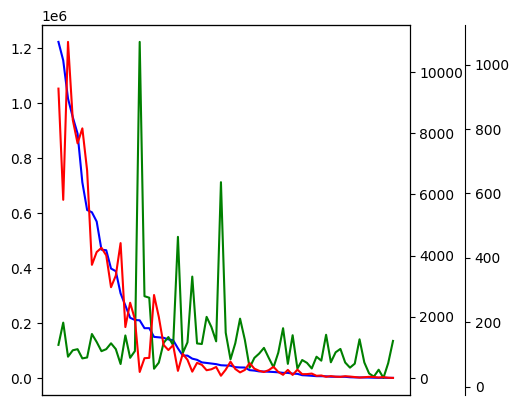

In [34]:
# 3. Revenue by product category (Graph / visualization)

# Revenue (rev) & revenue per sales (rps)
# 3.3 Top 30 and total
df_revenue_prodcat_rev_all = df_revenue_prodcat_full

# Create a sum of items from 30th onward for 'Total' row and merge
# https://stackoverflow.com/questions/41286569/get-total-of-pandas-column
# df_revenue_prodcat_rev_25 = df_revenue_prodcat_rev_all.iloc[:30] # select first 30 entry
# df_revenue_prodcat_rev_other = df_revenue_prodcat_rev_all.iloc[30:].sum(numeric_only=True) # sum into 'total'
# df_revenue_prodcat_rev_final = df_revenue_prodcat_rev_25.copy() # Create a copy to prevent warning
# df_revenue_prodcat_rev_final.loc['others'] = df_revenue_prodcat_rev_other # set 'other' row
df_revenue_prodcat_rev_all['revenue/sales'] = df_revenue_prodcat_rev_all['revenue'] / df_revenue_prodcat_rev_all['sales vol']

# df_revenue_prodcat_rev_final # Debugging - display table; disable if not needed
# Option 1 - matplotlib
# Multi axis plot utilizing matplotlib
# https://stackoverflow.com/questions/11640243/plot-multiple-y-axes
fig, ax = plt.subplots()
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.15))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)

df_revenue_prodcat_rev_all['revenue'].plot(ax=ax, style='b-')
df_revenue_prodcat_rev_all['sales vol'].plot(ax=ax, style='r-', secondary_y=True)
df_revenue_prodcat_rev_all['revenue/sales'].plot(ax=ax3, style='g-')

display(df_revenue_prodcat_rev_all)

## 2.3 Revenue by weight
 
The following is the data and graph chart of revenue by weight:

| Weight Cat       |   total revenue |   total revenue % |
|:-----------------|----------------:|------------------:|
| <=0.5kg          |       3,496,197 |                27 |
| >0.5 kg - 1.0 kg |       2,221,086 |                17 |
| >1.0KG - 3.0KG   |       3,184,619 |                25 |
| >10.0KG          |       1,673,833 |                13 |
| >3.0KG - 5.0KG   |         860,292 |                 7 |
| >5.0KG - 10.0KG  |       1,498,537 |                12 |

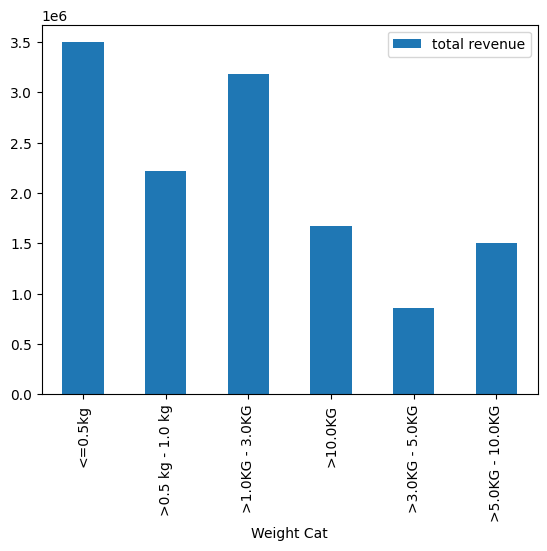

In [48]:
# 2.3 revenue by weight

df_weight_revenue = df_weight.copy()

# Group by weight cat
df_weight_revenue = df_weight_revenue.groupby("Weight Cat")['price'].sum().to_frame('total revenue')
df_weight_revenue['total revenue %'] = (df_weight_revenue['total revenue'] / df_weight_revenue['total revenue'].sum()) * 100

markdown_title = "## 2.3 Revenue by weight\n \nThe following is the data and graph chart of revenue by weight:"
df_weight_revenue_md = Markdown(df_weight_revenue.to_markdown(floatfmt=",.0f"))

display(Markdown(markdown_title))
display(df_weight_revenue_md)

df_weight_revenue_plot = df_weight_revenue.plot.bar(y='total revenue')

# 4. Correlation analysis

Analysis of correlation between factors present in the sales data, to present any possible correlation and predictive model that can be derived from data above.

## Brainstorming
1. Clustter
2. Correlation matrix (price, weight, review score)

In [16]:
# Back up - Delivery Time Taken and Delivery Time Dif

# Pre-process; convert relevant column to datetime
# col_to_convert = ["order_delivered_customer_date", "order_purchase_timestamp", "order_approved_at",
#                   "order_delivered_carrier_date", "order_estimated_delivery_date"]

# df_cor_reg = p_pd.convert_to_datetime(df_base, col_to_convert)
df_cor_reg = df_base
# new column
# Delivery Time Taken - time between order is place and order is delivered
df_cor_reg["Delivery Time Taken"] = df_cor_reg["order_delivered_customer_date"] - df_cor_reg["order_purchase_timestamp"]
# delivery time dif - difference between estimated and actual delivery date
df_cor_reg["Delivery Time Dif"] = df_cor_reg["order_estimated_delivery_date"] - df_cor_reg["order_delivered_customer_date"]

# Drop NaN
df_cor_reg.dropna(subset=["review_score","Delivery Time Taken"], inplace=True)

df_cor_reg.reset_index(inplace=True)

# review_unique = df_cor_reg["review_score"].unique()
# print(review_unique)
# print(df_cor_reg)

df_cor_reg_plot = df_cor_reg

# Convert to days
df_cor_reg_plot["Delivery Time Dif"] = df_cor_reg_plot["Delivery Time Dif"].dt.days
df_cor_reg_plot["Delivery Time Taken"] = df_cor_reg_plot["Delivery Time Taken"].dt.days

[5. 4. 1. 3. 2.]


<Axes: xlabel='review_score', ylabel='Delivery Time Taken'>

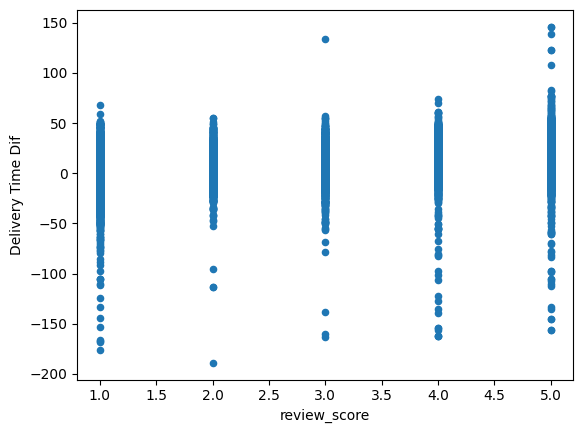

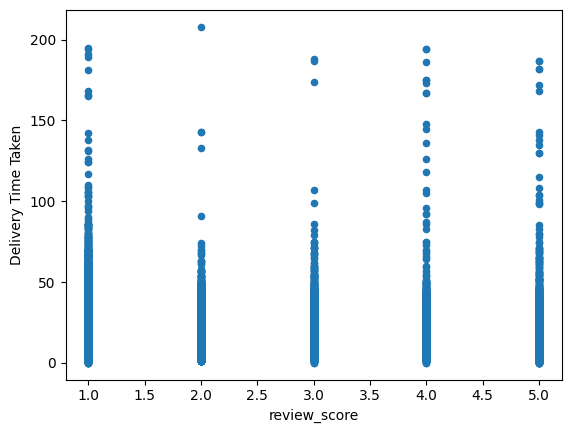

In [17]:
df_cor_reg_plot.plot.scatter(x="review_score",
                             y="Delivery Time Dif")

# df_cor_reg_plot["Delivery Time Taken"] = df_cor_reg_plot["Delivery Time Taken"].dt.days

df_cor_reg_plot.plot.scatter(x="review_score",
                             y="Delivery Time Taken")

In [18]:
# # Visualise 'review_score' and 'delivery_time_take"
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.subplot(1,2,2)
# sns.scatterplot(x=x, y=y, alpha=0.5)
# plt.plot([min(y), max(y)], [min(x), max(x)], color='red', linestyle='--')
# plt.title("Regression Fit: Actual vs Predicted")
# plt.xlabel("Actual Prices (in $100,000s)")
# plt.ylabel("Predicted Prices (in $100,000s)")

# plt.show()

In [19]:
# # Understanding Linear Regression (Sklearn)
# # https://www.datacamp.com/tutorial/sklearn-linear-regression

# # Linear regression testing for review score and delivery time taken

# # Import train_test_split.
# from sklearn.model_selection import train_test_split

# # Split the dataset into training (80%) and testing (20%) sets.
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
# # Import LinearRegression.
# from sklearn.linear_model import LinearRegression


# # Instantiate linear regression model.
# model = LinearRegression()

In [21]:
# model.fit(X_test, y_test)

In [22]:
# from sklearn.metrics import mean_squared_error, r2_score

# y_pred = model.predict(X_test)

# # Calculate and print R^2 score.
# r2 = r2_score(y_test, y_pred)
# print(f"R-squared: {r2:.4f}")